<a href="https://colab.research.google.com/github/EddyKubwimana/IntroductiontoAI-Final-Project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Libraries necessary for the project implementation

In [99]:

pip install librosa


In [100]:
pip install np_utils


In [211]:
import pandas as pd
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score, recall_score, f1_score, cohen_kappa_score, classification_report, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler, EarlyStopping

import os
import soundfile as sf
import librosa
import librosa.display
from tqdm import tqdm  # Optional: for a progress bar during processing

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from keras.utils import to_categorical
import np_utils
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

Fetching all 3 directory of the datasets We are going to use in this project

In [102]:
audio1='/content/drive/My Drive/AI FINAL/archive/' # Ravdess dataset
audio2 = '/content/drive/My Drive/AI FINAL/TESS/' # toronto data set
audio3='/content/drive/My Drive/AI FINAL/dataset2/AudioWAV' #crema-D


In [103]:
audio_directory_list = os.listdir(audio1)

In [104]:
print(audio_directory_list)

['Actor_20', 'Actor_18', 'Actor_24', 'Actor_16', 'Actor_22', 'Actor_17', 'Actor_23', 'Actor_21', 'Actor_19', 'Actor_11', 'Actor_14', 'Actor_08', 'Actor_13', 'Actor_15', 'Actor_12', 'Actor_06', 'Actor_10', 'Actor_09', 'Actor_07', 'Actor_02', 'Actor_05', 'Actor_03', 'Actor_01', 'Actor_04']


In [105]:
file_emotion = []
file_path = []
for dir in audio_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(audio1 + dir)
    for file in actor:
        part1 = file.split('.')[0]


        part = part1.split('-')

        file_emotion.append(int(part[2]))
        file_path.append(audio1+dir+"/"+file)
        # dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_data1 = pd.DataFrame(file_path, columns=['Path'])
audio_data1 = pd.concat([emotion_df, path_data1], axis=1)


In [106]:
audio_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  1442 non-null   int64 
 1   Path      1442 non-null   object
dtypes: int64(1), object(1)
memory usage: 22.7+ KB


In [107]:
audio_data1.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [108]:
audio_data1["Emotions"].value_counts()

calm        194
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: Emotions, dtype: int64

In [109]:
audio_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  1442 non-null   object
 1   Path      1442 non-null   object
dtypes: object(2)
memory usage: 22.7+ KB


DATASET2

In [110]:
#converting to list the second dataset
tess_directory_list = os.listdir(audio2)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(audio2 + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(audio2 + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_data2 = pd.DataFrame(file_path, columns=['Path'])
audio_data2 = pd.concat([emotion_df, path_data2], axis=1)


In [111]:
audio_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  2800 non-null   object
 1   Path      2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [112]:
audio_data2["Emotions"].value_counts()

surprise    400
fear        400
angry       400
sad         400
neutral     400
disgust     400
happy       400
Name: Emotions, dtype: int64

In [113]:
audio_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  2800 non-null   object
 1   Path      2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


DATASET 3

In [114]:
crema_directory_list = os.listdir(audio3)

file_emotion = []
file_path = []
for file in crema_directory_list:
    # storing file paths
    file_path.append(audio3 + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_data3 = pd.DataFrame(file_path, columns=['Path'])
audio_data3 = pd.concat([emotion_df, path_data3], axis=1)
audio_data3.head()

Emotions                                               Path
0    happy  /content/drive/My Drive/AI FINAL/dataset2/Audi...
1  neutral  /content/drive/My Drive/AI FINAL/dataset2/Audi...
2  neutral  /content/drive/My Drive/AI FINAL/dataset2/Audi...
3  disgust  /content/drive/My Drive/AI FINAL/dataset2/Audi...
4     fear  /content/drive/My Drive/AI FINAL/dataset2/Audi...

In [115]:
audio_data3["Emotions"].value_counts()

disgust    1274
angry      1274
sad        1274
happy      1273
fear       1272
neutral    1088
Name: Emotions, dtype: int64

In [116]:
audio_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7455 entries, 0 to 7454
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  7455 non-null   object
 1   Path      7455 non-null   object
dtypes: object(2)
memory usage: 116.6+ KB


In [117]:

# creating Dataframe using all the 4 dataframes we created so far.
collectivedata = pd.concat([audio_data1,audio_data2, audio_data3], axis = 0)
collectivedata.to_csv("/content/drive/My Drive/AI FINAL/collectiondata.csv",index=False)
collectivedata.head()

Emotions                                               Path
0  neutral  /content/drive/My Drive/AI FINAL/archive/Actor...
1  neutral  /content/drive/My Drive/AI FINAL/archive/Actor...
2     calm  /content/drive/My Drive/AI FINAL/archive/Actor...
3     calm  /content/drive/My Drive/AI FINAL/archive/Actor...
4     calm  /content/drive/My Drive/AI FINAL/archive/Actor...

In [118]:
initialdata = pd.read_csv("/content/drive/My Drive/AI FINAL/collectiondata.csv")

In [119]:
initialdata.head()

Emotions                                               Path
0  neutral  /content/drive/My Drive/AI FINAL/archive/Actor...
1  neutral  /content/drive/My Drive/AI FINAL/archive/Actor...
2     calm  /content/drive/My Drive/AI FINAL/archive/Actor...
3     calm  /content/drive/My Drive/AI FINAL/archive/Actor...
4     calm  /content/drive/My Drive/AI FINAL/archive/Actor...

# Data Visualisation

In [120]:
collectivedata["Emotions"].value_counts()

sad         1866
angry       1866
disgust     1866
happy       1865
fear        1864
neutral     1584
surprise     592
calm         194
Name: Emotions, dtype: int64

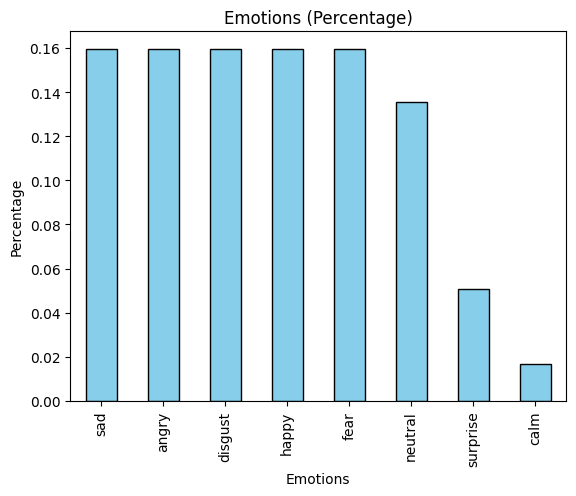

In [121]:
# Count the occurrences of each class
class_counts = collectivedata['Emotions'].value_counts()

# Calculate the percentage distribution
class_distribution = class_counts / len(collectivedata)

# Plot the distribution
class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Emotions (Percentage)')
plt.xlabel('Emotions')
plt.ylabel('Percentage')
plt.show()

In [122]:
def waveplot(collectivedata, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waves of audio with {} emotion'.format(e), size=20)
    librosa.display.waveshow(collectivedata, sr=sr)
    plt.show()


In [123]:
def spectogram(collectivedata, sr, e):
  x=librosa.stft(collectivedata)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(12,3))
  plt.title('spectogram for audio along {} the emotions'.format(e), size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

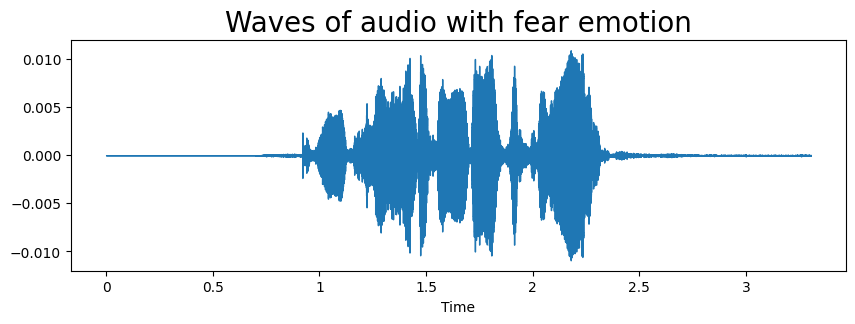

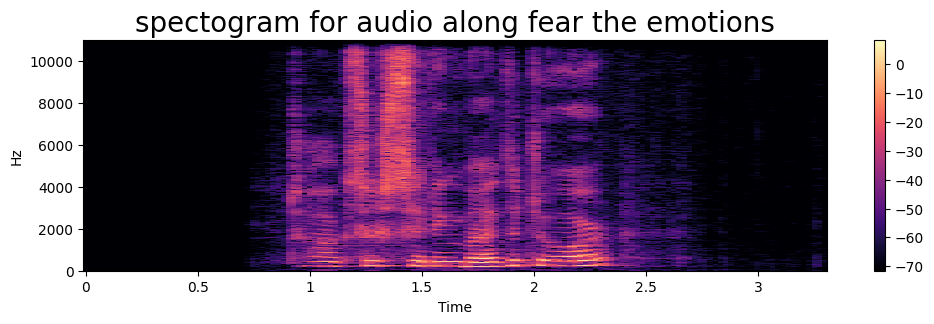

In [124]:
emotion='fear'
fearpath = np.array(collectivedata.Path[collectivedata.Emotions==emotion])
feardata, sampling_rate = librosa.load(fearpath[1])

waveplot(feardata, sampling_rate, emotion)
spectogram(feardata, sampling_rate, emotion)
Audio(fearpath[1])

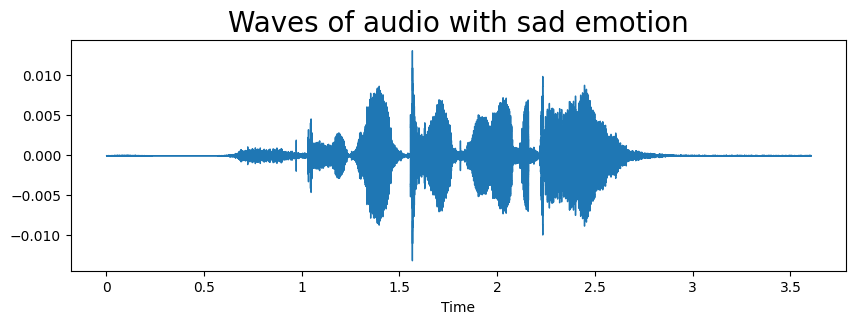

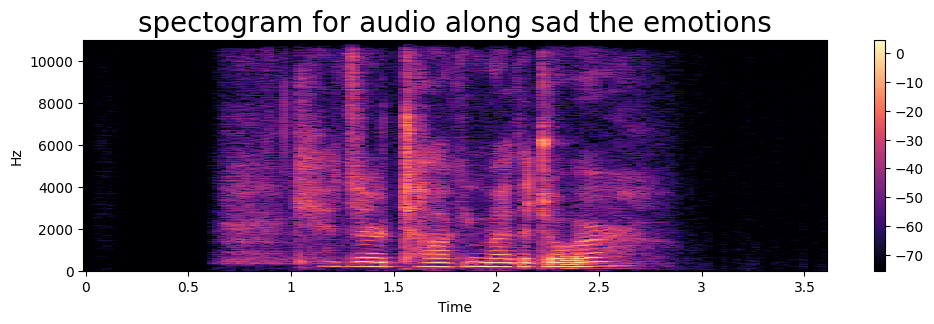

In [125]:
emotion='sad'
sadpath = np.array(collectivedata.Path[collectivedata.Emotions==emotion])
saddata, sampling_rate = librosa.load(sadpath[1])

waveplot(saddata, sampling_rate, emotion)
spectogram(saddata, sampling_rate, emotion)
Audio(sadpath[1])

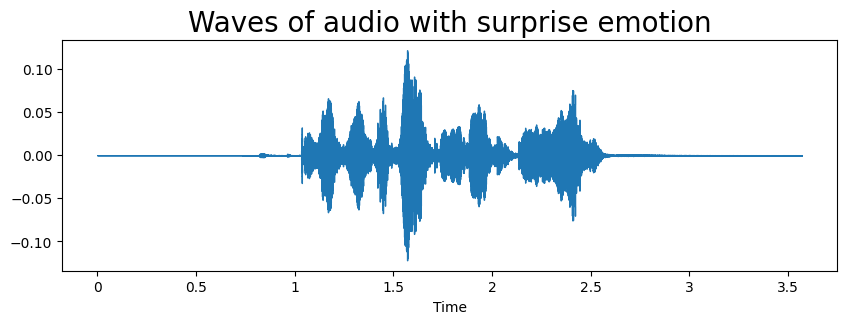

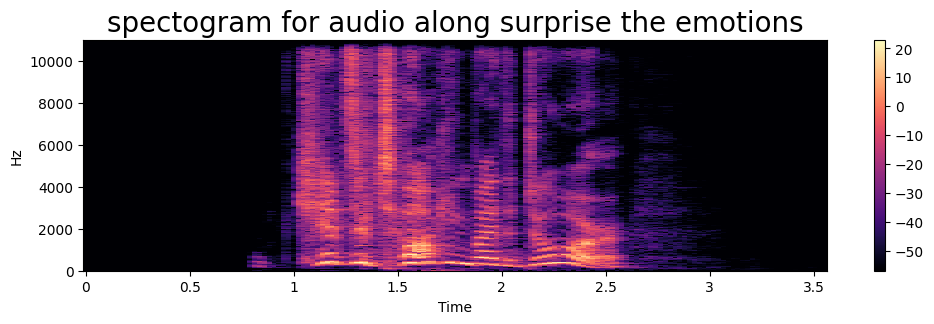

In [126]:
emotion='surprise'
surprisepath = np.array(collectivedata.Path[collectivedata.Emotions==emotion])
surprisedata, sampling_rate = librosa.load(surprisepath[1])

waveplot(surprisedata, sampling_rate, emotion)
spectogram(surprisedata, sampling_rate, emotion)
Audio(surprisepath[1])

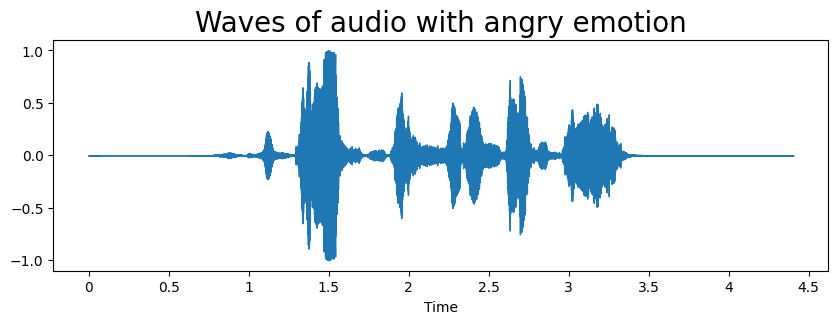

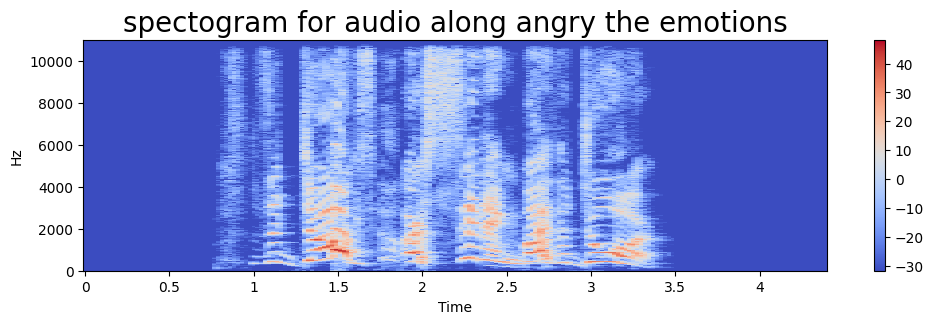

In [127]:
emotion='angry'
angrypath = np.array(collectivedata.Path[collectivedata.Emotions==emotion])
angrydata, sampling_rate = librosa.load(angrypath[1])

waveplot(angrydata, sampling_rate, emotion)
spectogram(angrydata, sampling_rate, emotion)
Audio(angrypath[1])

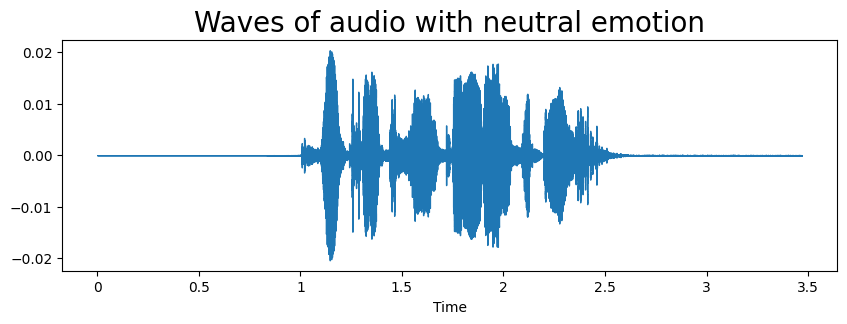

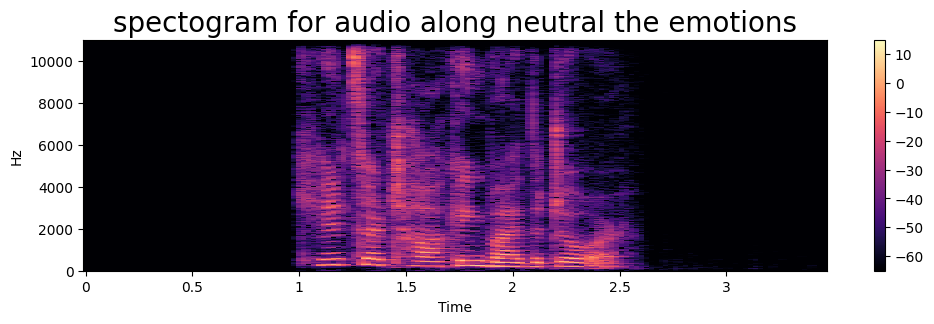

In [128]:
emotion='neutral'
neutralpath = np.array(collectivedata.Path[collectivedata.Emotions==emotion])
neutraldata, sampling_rate = librosa.load(neutralpath[1])

waveplot(neutraldata, sampling_rate, emotion)
spectogram(neutraldata, sampling_rate, emotion)
Audio(neutralpath[1])

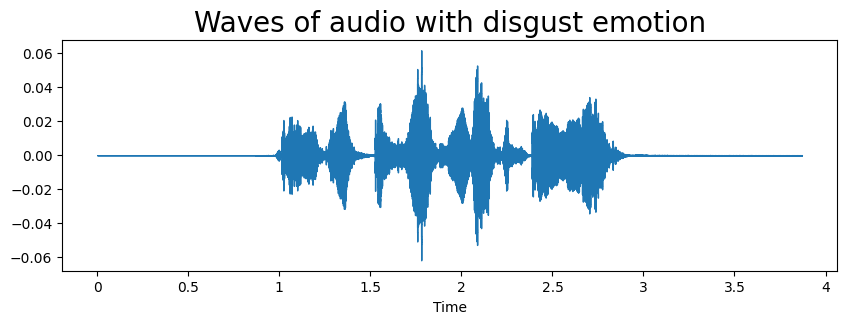

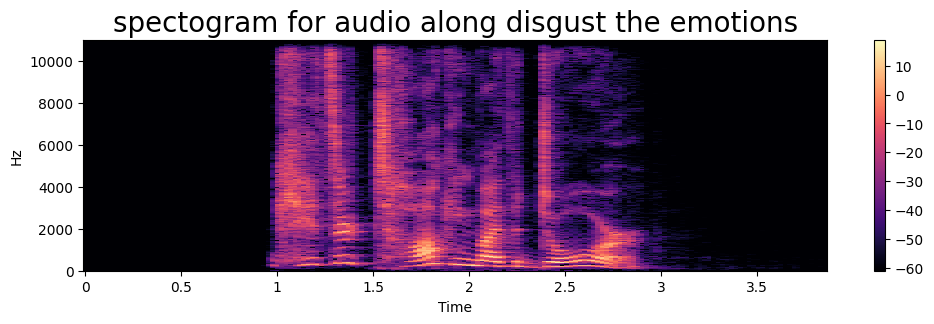

In [129]:
emotion='disgust'
disgustpath = np.array(collectivedata.Path[collectivedata.Emotions==emotion])
disgutdata, sampling_rate = librosa.load(disgustpath[1])

waveplot(disgutdata, sampling_rate, emotion)
spectogram(disgutdata, sampling_rate, emotion)
Audio(disgustpath[1])

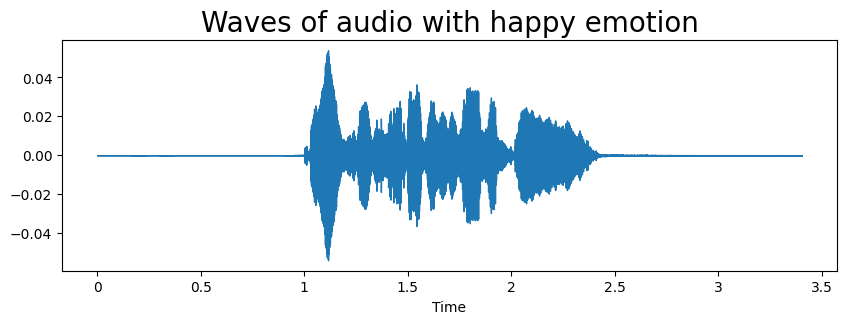

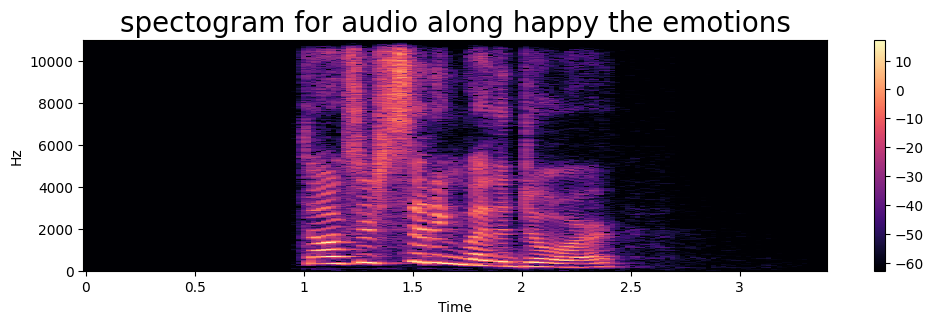

In [130]:
emotion='happy'
happypath = np.array(collectivedata.Path[collectivedata.Emotions==emotion])
happydata, sampling_rate = librosa.load(happypath[1])

waveplot(happydata, sampling_rate, emotion)
spectogram(happydata, sampling_rate, emotion)
Audio(happypath[1])

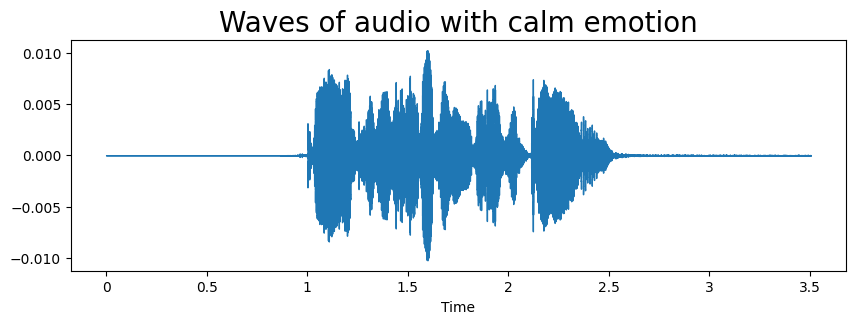

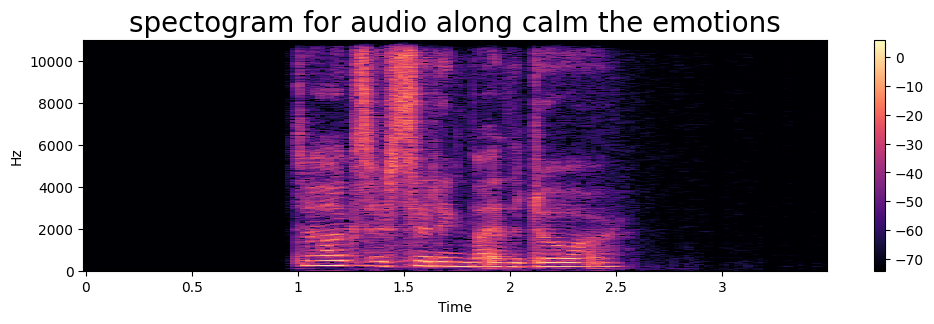

In [131]:
emotion='calm'
calmpath = np.array(collectivedata.Path[collectivedata.Emotions==emotion])
calmdata, sampling_rate = librosa.load(calmpath[1])

waveplot(calmdata, sampling_rate, emotion)
spectogram(calmdata, sampling_rate, emotion)
Audio(calmpath[1])

# data augmentation function definition




In [132]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data,rate = 1.5)


def compress(data):
    return librosa.effects.time_stretch(data,rate = 0.5)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch_up(data):
    return librosa.effects.pitch_shift(data, sr = 0.7, n_steps=2)



def pitch_down(data):
    return librosa.effects.pitch_shift(data, sr = 0.7, n_steps=-2)


def jitter(data):
  jitter_factor = np.random.uniform(-0.02, 0.02, len(data))
  y_jittered =data+jitter_factor
  return y_jittered


#Feautre extraction function definition

In [133]:
def extract_features(data,sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally
    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data,sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data1 = stretch(data)
    data_stretch_pitch_up = pitch_up(new_data1)
    res3 = extract_features(data_stretch_pitch_up,sample_rate)
    result = np.vstack((result, res3))


    # data with stretching and pitching
    new_data2= stretch(data)
    data_stretch_pitch_down= pitch_down(new_data2)
    res4 = extract_features(data_stretch_pitch_down,sample_rate)
    result = np.vstack((result, res4))

     # data with jitter
    jitter_data = jitter(data)
    res5 = extract_features(jitter_data,sample_rate)
    result = np.vstack((result, res5)) #

     # data with stretching and pitching
    new_data3= compress(data)
    data_compress_pitch_down= pitch_down(new_data3)
    res6 = extract_features(data_compress_pitch_down,sample_rate)
    result = np.vstack((result, res6))


    # data with stretching and pitching
    new_data4= compress(data)
    data_compress_pitch_up= pitch_up(new_data4)
    res7 = extract_features(data_compress_pitch_up,sample_rate)
    result = np.vstack((result, res7))




    return result

In [134]:
X, Y = [], []
for path, emotion in zip(initialdata.Path, initialdata.Emotions):
  try:
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
  except:

    continue


<ipython-input-133-e7581b782aae>:27: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [135]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('/content/drive/My Drive/AI FINAL/reducedfeatures.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.282647  0.640147  0.578027  0.598746  0.604783  0.630139  0.608984   
1  0.290541  0.678980  0.652225  0.672266  0.676467  0.723072  0.639869   
2  0.210700  0.587610  0.730747  0.683169  0.551376  0.567230  0.511677   
3  0.180664  0.598100  0.595051  0.636045  0.623905  0.613656  0.615453   
4  0.477146  0.868810  0.869867  0.903074  0.914513  0.922598  0.779928   

          7         8         9  ...       153       154       155       156  \
0  0.574480  0.584435  0.560920  ...  0.000035  0.000043  0.000043  0.000034   
1  0.615448  0.612079  0.593485  ...  0.000061  0.000068  0.000069  0.000059   
2  0.559662  0.629380  0.593000  ...  0.000002  0.000003  0.000003  0.000006   
3  0.589045  0.541568  0.631309  ...  0.000010  0.000015  0.000011  0.000003   
4  0.746486  0.757797  0.772435  ...  0.009720  0.009571  0.009539  0.009118   

            157           158           159           160           161  \
0  4.818175e-05  5.292810e-05  7.011517e-05  4.885273e-05  5.253100e-06   
1  6.799297e-05  7.646816e-05  9.367713e-05  7.554529e-05  2.911351e-05   
2  4.515866e-06  4.230356e-06  5.249592e-06  2.656934e-06  2.575574e-07   
3  1.766822e-08  8.217559e-16  1.992254e-16  1.594562e-16  1.487309e-16   
4  9.756299e-03  9.362338e-03  9.555272e-03  9.763976e-03  9.760598e-03   

    labels  
0  neutral  
1  neutral  
2  neutral  
3  neutral  
4  neutral  

[5 rows x 163 columns]

In [136]:
Features = pd.read_csv('/content/drive/My Drive/AI FINAL/reducedfeatures.csv')

In [137]:
Features.head()

0         1         2         3         4         5         6  \
0  0.282647  0.640147  0.578027  0.598746  0.604783  0.630139  0.608984   
1  0.290541  0.678980  0.652225  0.672266  0.676467  0.723072  0.639869   
2  0.210700  0.587610  0.730747  0.683169  0.551376  0.567230  0.511677   
3  0.180664  0.598100  0.595051  0.636045  0.623905  0.613656  0.615453   
4  0.477146  0.868810  0.869867  0.903074  0.914513  0.922598  0.779928   

          7         8         9  ...       153       154       155       156  \
0  0.574480  0.584435  0.560920  ...  0.000035  0.000043  0.000043  0.000034   
1  0.615448  0.612079  0.593485  ...  0.000061  0.000068  0.000069  0.000059   
2  0.559662  0.629380  0.593000  ...  0.000002  0.000003  0.000003  0.000006   
3  0.589045  0.541568  0.631309  ...  0.000010  0.000015  0.000011  0.000003   
4  0.746486  0.757797  0.772435  ...  0.009720  0.009571  0.009539  0.009118   

            157           158           159           160           161  \
0  4.818175e-05  5.292810e-05  7.011517e-05  4.885273e-05  5.253100e-06   
1  6.799297e-05  7.646816e-05  9.367713e-05  7.554529e-05  2.911351e-05   
2  4.515866e-06  4.230356e-06  5.249592e-06  2.656934e-06  2.575574e-07   
3  1.766822e-08  8.217559e-16  1.992254e-16  1.594562e-16  1.487309e-16   
4  9.756299e-03  9.362338e-03  9.555272e-03  9.763976e-03  9.760598e-03   

    labels  
0  neutral  
1  neutral  
2  neutral  
3  neutral  
4  neutral  

[5 rows x 163 columns]

In [138]:
X = Features.iloc[:,:-1].values

In [139]:
Y =Features['labels'].values

In [140]:
encoder = OneHotEncoder()

In [141]:
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [142]:
Y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [143]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True, stratify = Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22270, 162), (22270, 8), (7424, 162), (7424, 8))

In [144]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22270, 162), (22270, 8), (7424, 162), (7424, 8))

In [145]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22270, 162, 1), (22270, 8), (7424, 162, 1), (7424, 8))

In [146]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [147]:



# Step 4: Build the Model
model = Sequential()

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=8, activation='softmax'))

# Step 5: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Implement Regularization, Learning Rate Scheduling, and Early Stopping
def lr_schedule(epoch):
    return 0.001 * 0.9 ** epoch

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 7: Train the Model
history = model.fit(x_train, y_train, epochs=60, batch_size=113, validation_split=0.2, callbacks=[lr_scheduler, early_stopping])

# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/60
158/158 [==============================] - 24s 144ms/step - loss: 1.6655 - accuracy: 0.4556 - val_loss: 1.2434 - val_accuracy: 0.6152 - lr: 0.0010
Epoch 2/60
158/158 [==============================] - 21s 131ms/step - loss: 1.2501 - accuracy: 0.5857 - val_loss: 1.0515 - val_accuracy: 0.6792 - lr: 9.0000e-04
Epoch 3/60
158/158 [==============================] - 21s 131ms/step - loss: 1.1092 - accuracy: 0.6266 - val_loss: 0.9468 - val_accuracy: 0.7045 - lr: 8.1000e-04
Epoch 4/60
158/158 [==============================] - 21s 134ms/step - loss: 1.0272 - accuracy: 0.6551 - val_loss: 0.8956 - val_accuracy: 0.7220 - lr: 7.2900e-04
Epoch 5/60
158/158 [==============================] - 23s 147ms/step - loss: 0.9791 - accuracy: 0.6743 - val_loss: 0.8559 - val_accuracy: 0.7324 - lr: 6.5610e-04
Epoch 6/60
158/158 [==============================] - 22s 139ms/step - loss: 0.9403 - accuracy: 0.6879 - val_loss: 0.8215 - val_accuracy: 0.7470 - lr: 5.9049e-04
Epoch 7/60
158/158 [============

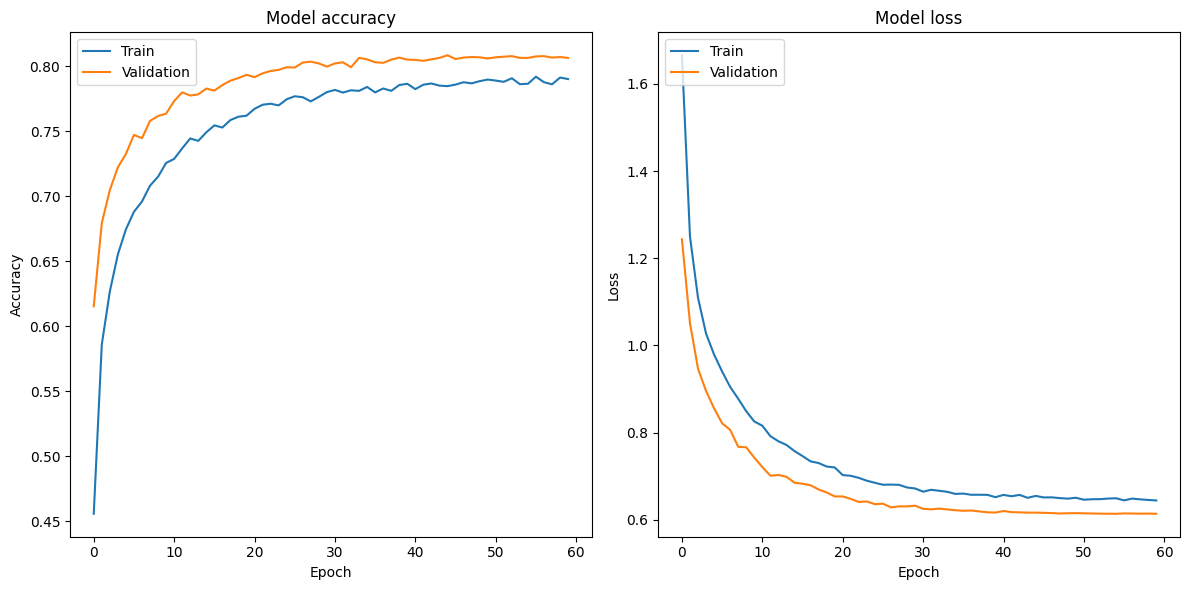

In [148]:
plot_training_history(history)

In [149]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 162, 128)          768       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 81, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 81, 64)            41024     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 41, 64)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2624)              0         
                                                                 
 dense_2 (Dense)             (None, 32)               

#Model Evaluation

In [150]:
predictions = model.predict(x_test)

232/232 [==============================] - 3s 14ms/step


In [151]:
predictionslabel = encoder.inverse_transform(predictions)

In [152]:
y_testlabel = encoder.inverse_transform(y_test)

In [153]:
predictiondf = pd.DataFrame(columns = ["Predicted y", "Actual y"])

In [154]:
predictiondf["Predicted y"] = predictionslabel.flatten()
predictiondf["Actual y"] = y_testlabel.flatten()

In [155]:
predictiondf.head(100)

Predicted y  Actual y
0     surprise  surprise
1          sad       sad
2        angry     angry
3        happy     happy
4        happy  surprise
..         ...       ...
95        fear      fear
96        fear      fear
97        fear      fear
98         sad       sad
99        calm   disgust

[100 rows x 2 columns]

In [212]:
confusionMatrix = confusion_matrix(y_testlabel, predictionslabel)

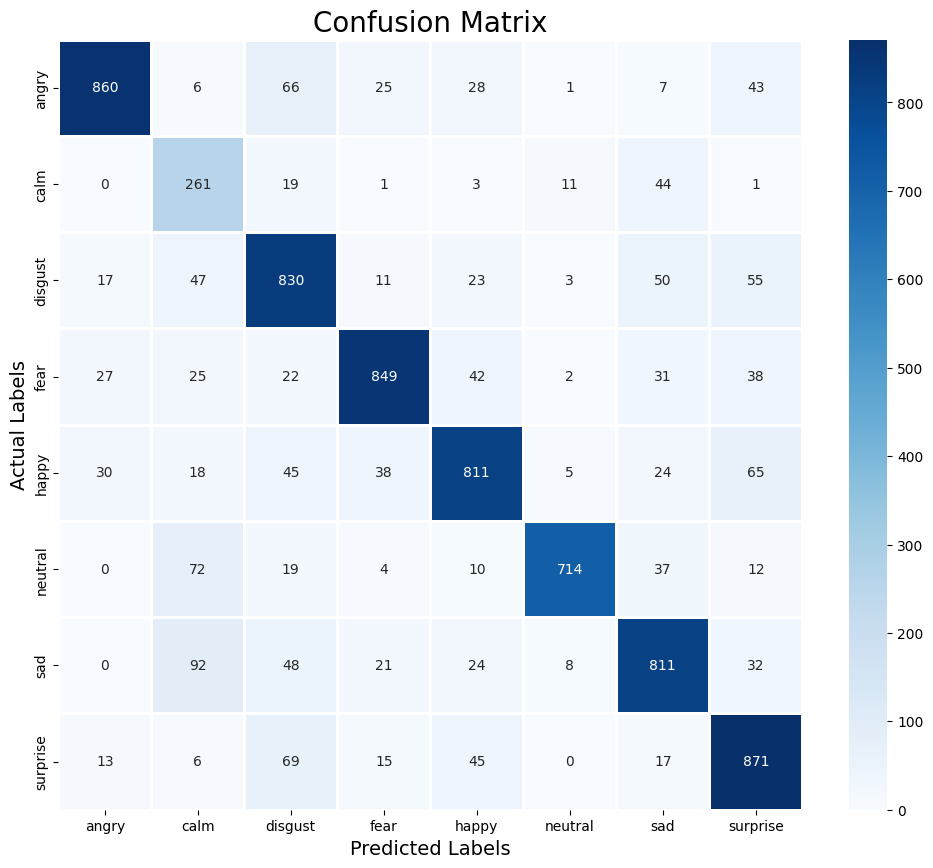

In [157]:

plt.figure(figsize = (12, 10))
cm = pd.DataFrame(confusionMatrix , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [213]:
accuracy = accuracy_score(y_testlabel,predictionslabel)

In [215]:
accuracy

0.8091325431034483

In [160]:
 #Precision, Recall, F1-Score
precision = precision_score(y_testlabel, predictionslabel, average='macro')
recall = recall_score(y_testlabel, predictionslabel, average='macro')
f1 = f1_score(y_testlabel, predictionslabel, average='macro')
print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1-Score (Macro):", f1)

# Micro Average
precision_micro = precision_score(y_testlabel, predictionslabel, average='micro')
recall_micro = recall_score(y_testlabel, predictionslabel, average='micro')
f1_micro = f1_score(y_testlabel, predictionslabel, average='micro')
print("Precision (Micro):", precision_micro)
print("Recall (Micro):", recall_micro)
print("F1-Score (Micro):", f1_micro)

# Weighted Average
precision_weighted = precision_score(y_testlabel, predictionslabel, average='weighted')
recall_weighted = recall_score(y_testlabel, predictionslabel, average='weighted')
f1_weighted = f1_score(y_testlabel, predictionslabel, average='weighted')
print("Precision (Weighted):", precision_weighted)
print("Recall (Weighted):", recall_weighted)
print("F1-Score (Weighted):", f1_weighted)

# Cohen's Kappa
kappa = cohen_kappa_score(y_testlabel, predictionslabel)
print("Cohen's Kappa:", kappa)

# Classification Report
class_report = classification_report(y_testlabel, predictionslabel)
print("Classification Report:\n", class_report)



# ROC-AUC Score
# Note: roc_auc_score requires predicted probabilities, not predicted labels
# Replace y_pred_proba with your predicted probabilities
roc_auc = roc_auc_score(y_test,predictions, multi_class='ovr', average='macro')
print("ROC-AUC Score:", roc_auc)

Precision (Macro): 0.7978460999421103
Recall (Macro): 0.8059213201409596
F1-Score (Macro): 0.7968463413777523
Precision (Micro): 0.8091325431034483
Recall (Micro): 0.8091325431034483
F1-Score (Micro): 0.8091325431034483
Precision (Weighted): 0.8225517750065305
Recall (Weighted): 0.8091325431034483
F1-Score (Weighted): 0.8130918202181976
Cohen's Kappa: 0.7804544825418058
Classification Report:
               precision    recall  f1-score   support

       angry       0.91      0.83      0.87      1036
        calm       0.50      0.77      0.60       340
     disgust       0.74      0.80      0.77      1036
        fear       0.88      0.82      0.85      1036
       happy       0.82      0.78      0.80      1036
     neutral       0.96      0.82      0.89       868
         sad       0.79      0.78      0.79      1036
    surprise       0.78      0.84      0.81      1036

    accuracy                           0.81      7424
   macro avg       0.80      0.81      0.80      7424
weighte

In [161]:
model.save('/content/drive/My Drive/AI FINAL')

In [162]:
loaded_model = keras.models.load_model('/content/drive/My Drive/AI FINAL')

In [163]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 162, 128)          768       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 81, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 81, 64)            41024     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 41, 64)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2624)              0         
                                                                 
 dense_2 (Dense)             (None, 32)               

# Test the model on new data in a different language that has never been by the model



In [164]:
testpath ='/content/drive/My Drive/AI FINAL/EMOVO/'

In [165]:
test_directory_list = os.listdir(testpath)

In [166]:
file_emotion = []
file_path = []
for dir in test_directory_list:

  try:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(testpath+"/"+ dir)
    for file in actor:
        part1 = file.split('.')[0]


        part = part1.split('-')

        if part[0] == 'dis':
            file_emotion.append('disgust')

        elif part[0] == 'rab':
            file_emotion.append('angry')
        elif part[0] == 'tri':
            file_emotion.append('sad')
        elif part[0] == 'sor':
            file_emotion.append('surprise')
        elif part[0] == 'pau':
            file_emotion.append('fear')
        elif part[0] == 'gio':
            file_emotion.append('happy')
        elif part[0] == 'neu':
            file_emotion.append('neutral')
        else:
            file_emotion.append('Unknown')


        file_path.append(testpath+dir+"/"+file)
        # dataframe for emotion of files

  except:

    continue
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_test = pd.DataFrame(file_path, columns=['Path'])
audio_test = pd.concat([emotion_df, path_test], axis=1)

In [167]:
audio_test["Emotions"].value_counts()

neutral     84
angry       84
disgust     84
fear        84
happy       84
sad         84
surprise    84
Name: Emotions, dtype: int64

In [168]:
audio_test["Path"]

0      /content/drive/My Drive/AI FINAL/EMOVO/f2/neu-...
1      /content/drive/My Drive/AI FINAL/EMOVO/f2/neu-...
2      /content/drive/My Drive/AI FINAL/EMOVO/f2/neu-...
3      /content/drive/My Drive/AI FINAL/EMOVO/f2/neu-...
4      /content/drive/My Drive/AI FINAL/EMOVO/f2/neu-...
                             ...                        
583    /content/drive/My Drive/AI FINAL/EMOVO/m3/sor-...
584    /content/drive/My Drive/AI FINAL/EMOVO/m3/sor-...
585    /content/drive/My Drive/AI FINAL/EMOVO/m3/sor-...
586    /content/drive/My Drive/AI FINAL/EMOVO/m3/sor-...
587    /content/drive/My Drive/AI FINAL/EMOVO/m3/sor-...
Name: Path, Length: 588, dtype: object

In [169]:
def get_features_test(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    res1 = extract_features(data,sample_rate)

    return res1



In [170]:
X1, Y1 = [], []
for path, emotion in zip(audio_test.Path, audio_test.Emotions):
    feature = get_features_test(path)
    X1.append(feature)
    # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
    Y1.append(emotion)



In [171]:
testpd = pd.DataFrame(X1)

In [172]:
testpd.head()

0         1         2         3         4         5         6    \
0  0.230146  0.583520  0.510074  0.494278  0.478219  0.418835  0.336927   
1  0.136995  0.448976  0.440102  0.390376  0.367058  0.355474  0.336084   
2  0.079415  0.381957  0.390962  0.315755  0.279828  0.285536  0.315241   
3  0.150119  0.516569  0.442886  0.448471  0.363903  0.308872  0.339101   
4  0.137221  0.567693  0.509831  0.482020  0.416227  0.388374  0.386192   

        7         8         9    ...       152       153       154       155  \
0  0.389341  0.529202  0.569369  ...  0.006958  0.008408  0.009104  0.004641   
1  0.449512  0.497555  0.448382  ...  0.011809  0.013844  0.017928  0.010176   
2  0.487700  0.451164  0.461183  ...  0.000192  0.000196  0.000196  0.000211   
3  0.466701  0.559869  0.479846  ...  0.011046  0.004074  0.006798  0.011822   
4  0.397504  0.552366  0.549798  ...  0.001841  0.003589  0.005513  0.004927   

        156       157       158       159       160       161  
0  0.003738  0.004233  0.005602  0.005318  0.003908  0.000455  
1  0.003158  0.003226  0.005735  0.004542  0.002521  0.000312  
2  0.000155  0.000103  0.000146  0.000094  0.000032  0.000004  
3  0.012919  0.010609  0.004363  0.001201  0.000264  0.000024  
4  0.007470  0.004592  0.003104  0.003640  0.000976  0.000038  

[5 rows x 162 columns]

In [173]:
ypd = pd.DataFrame(Y1, columns = ["Labels"])

In [174]:
ypd.head()

Labels
0  neutral
1  neutral
2  neutral
3  neutral
4  neutral

In [175]:
ypd["Labels"].value_counts()

neutral     84
angry       84
disgust     84
fear        84
happy       84
sad         84
surprise    84
Name: Labels, dtype: int64

In [176]:
unseen = pd.concat([testpd,ypd])

In [177]:
unseen.to_csv('/content/drive/My Drive/AI FINAL/unseen.csv', index=False)

In [178]:
testpd.head()

0         1         2         3         4         5         6    \
0  0.230146  0.583520  0.510074  0.494278  0.478219  0.418835  0.336927   
1  0.136995  0.448976  0.440102  0.390376  0.367058  0.355474  0.336084   
2  0.079415  0.381957  0.390962  0.315755  0.279828  0.285536  0.315241   
3  0.150119  0.516569  0.442886  0.448471  0.363903  0.308872  0.339101   
4  0.137221  0.567693  0.509831  0.482020  0.416227  0.388374  0.386192   

        7         8         9    ...       152       153       154       155  \
0  0.389341  0.529202  0.569369  ...  0.006958  0.008408  0.009104  0.004641   
1  0.449512  0.497555  0.448382  ...  0.011809  0.013844  0.017928  0.010176   
2  0.487700  0.451164  0.461183  ...  0.000192  0.000196  0.000196  0.000211   
3  0.466701  0.559869  0.479846  ...  0.011046  0.004074  0.006798  0.011822   
4  0.397504  0.552366  0.549798  ...  0.001841  0.003589  0.005513  0.004927   

        156       157       158       159       160       161  
0  0.003738  0.004233  0.005602  0.005318  0.003908  0.000455  
1  0.003158  0.003226  0.005735  0.004542  0.002521  0.000312  
2  0.000155  0.000103  0.000146  0.000094  0.000032  0.000004  
3  0.012919  0.010609  0.004363  0.001201  0.000264  0.000024  
4  0.007470  0.004592  0.003104  0.003640  0.000976  0.000038  

[5 rows x 162 columns]

In [179]:

newxtest = scaler.transform(testpd)

In [180]:
newxtest =pd.DataFrame(newxtest)

In [181]:
newxtest.head()

0         1         2         3         4         5         6    \
0  0.715193  0.282082 -0.200814 -0.289758 -0.440118 -0.808388 -1.286619   
1 -0.206560 -0.581891 -0.633528 -0.927883 -1.138795 -1.194232 -1.292081   
2 -0.776319 -1.012260 -0.937417 -1.386172 -1.687056 -1.620126 -1.427127   
3 -0.076690 -0.147845 -0.616309 -0.571087 -1.158625 -1.478023 -1.272532   
4 -0.204325  0.180453 -0.202312 -0.365039 -0.829752 -0.993885 -0.967415   

        7         8         9    ...       152       153       154       155  \
0 -0.973324 -0.095519  0.159069  ...  0.793683  1.037947  1.157849  0.399376   
1 -0.569515 -0.314373 -0.672299  ...  1.664798  1.995297  2.700143  1.393566   
2 -0.313233 -0.635187 -0.584334  ... -0.421116 -0.408197 -0.398922 -0.396065   
3 -0.454158  0.116559 -0.456094  ...  1.527810  0.274693  0.754973  1.689168   
4 -0.918543  0.064673  0.024583  ... -0.125076  0.189245  0.530387  0.450748   

        156       157       158       159       160       161  
0  0.302384  0.414150  0.676406  0.643428  0.451446 -0.309480  
1  0.186086  0.210301  0.702621  0.487024  0.136856 -0.347326  
2 -0.416549 -0.421963 -0.397387 -0.410378 -0.427377 -0.428987  
3  2.144564  1.705006  0.432570 -0.187115 -0.374784 -0.423690  
4  1.051201  0.486824  0.184681  0.304903 -0.213464 -0.420008  

[5 rows x 162 columns]

In [182]:
newx = np.expand_dims(newxtest, axis=2)

In [183]:
newx.shape

(588, 162, 1)

In [184]:
predictions = loaded_model.predict(newx)

19/19 [==============================] - 0s 10ms/step


In [185]:
predictions[0]

array([0.01958016, 0.00336943, 0.70440954, 0.04215596, 0.03042864,
       0.01302683, 0.03864288, 0.14838661], dtype=float32)

In [198]:
y_new = encoder.inverse_transform(predictions)

In [218]:
accuracy_score(ypd, y_new)

0.21258503401360543

In [219]:
confusionMatrix = confusion_matrix(ypd, y_new)

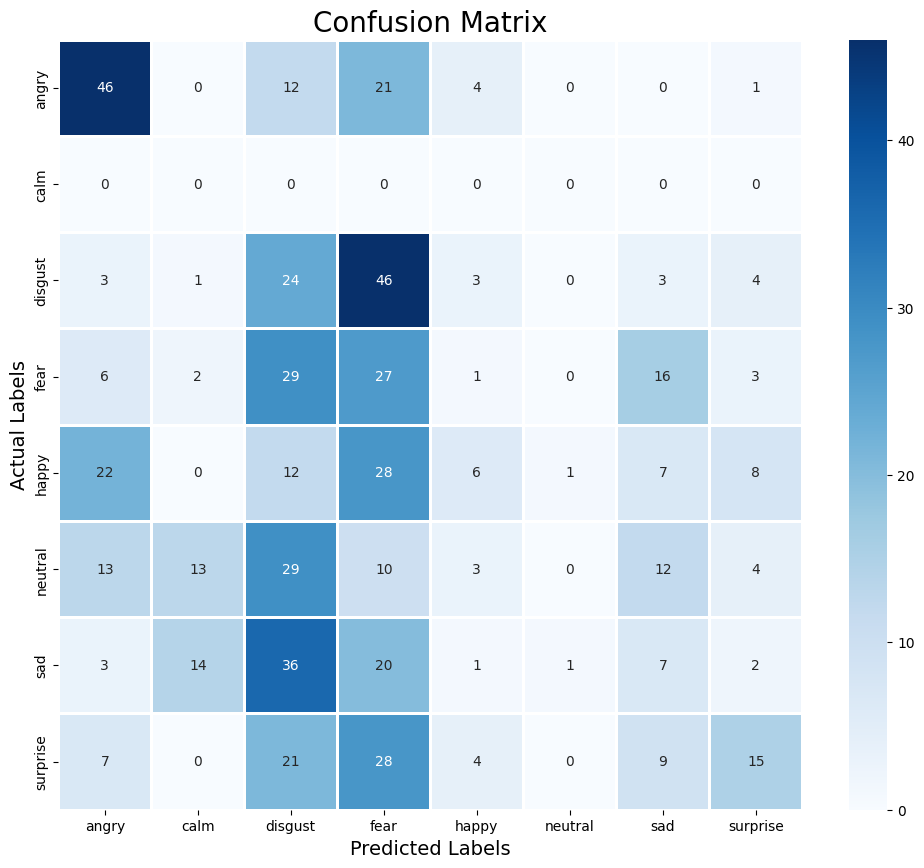

In [221]:
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(confusionMatrix , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()